# Matplotlib Tutorial

# Introductory

## Bibliotecas

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Simples Exemplo

> matplottlib faz gráficos de seus dados em __Figure__  (por exemplo, janelas, widgets Jupyter, etc.), cada um dos quais pode conter um ou mais Axes uma área onde os pontos podem ser especificados em termos de coordenadas x-y (ou theta-r em um gráfico polar, x-y-z em um gráfico 3D, etc.). A maneira mais simples de criar uma Figure com um __axes__ é usando pyplot.subplots. Podemos então usar Axes.plot para desenhar alguns dados sobre os Axes

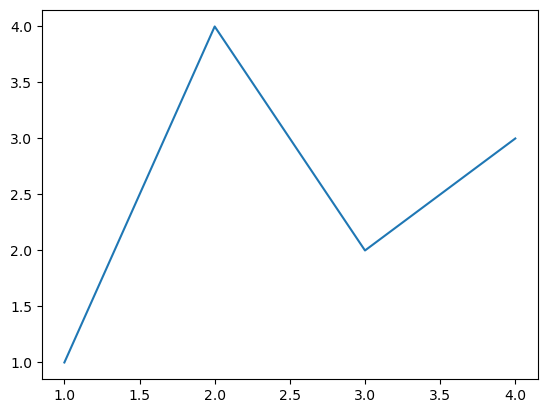

In [2]:
fig, ax = plt.subplots() # Cria a figura que contem um axes
ax.plot([1, 2, 3, 4],[1, 4, 2, 3]) # plota alguns dados no axes

## Partes de um Figure
Aqui vemos os components de __Figure__ Matplotlib

<img src="..//images/anatomy.webp"/>

## Figure

> A figura inteira. A __Figure__ acompanha todos os __Axes__, um grupo de especial componentes  (títulos, lendas de figuras, barras de cores, etc.) e até mesmo subfiguras aninhadas.

A maneira mais fácil de criar uma nova Figura é com o pyplot:

<Figure size 640x480 with 0 Axes>

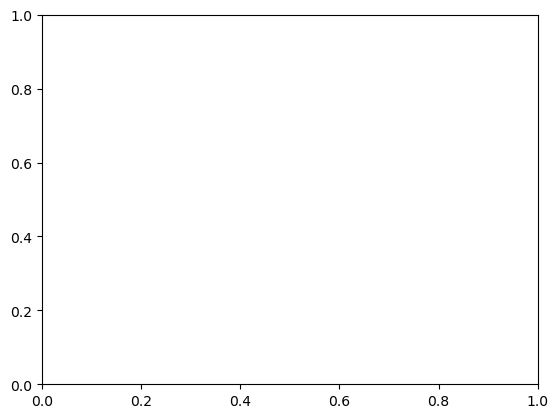

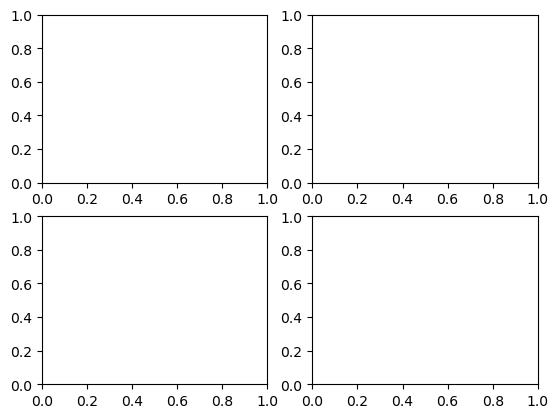

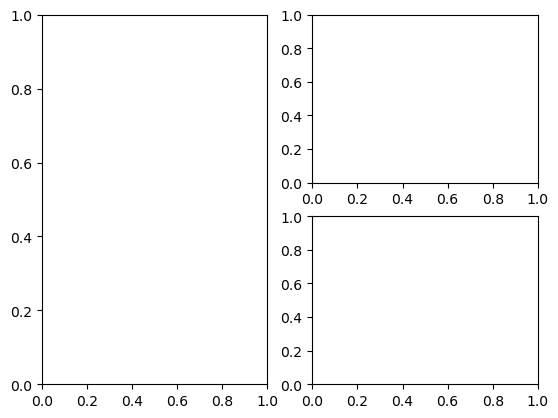

In [3]:
fig = plt.figure()  # uma figura vazia sem axes
fig, ax = plt.subplots() # um figura com um axes simples
fig, ax1 = plt.subplots(2, 2) # um figura com um grid de axes 2 x 2
# uma figura com um axes on na esquerda , e dois na direita
fig, ax2 = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])


Muitas vezes é conveniente criar os Eixos junto com a Figura, mas você também pode adicionar Machados manualmente mais tarde. Observe que muitos [Matplotlib backends](https://matplotlib.org/stable/users/explain/backends) suportam zoom e panorâmica em janelas de figuras.

Mais exemplos de  [figures](https://matplotlib.org/stable/users/explain/figures.html#figure-explanation):





### Creating

Text(0.0, 1.0, 'Axes')

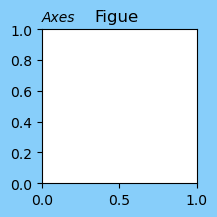

In [4]:
fig = plt.figure(figsize=(2,2), facecolor='lightskyblue')
fig.suptitle('Figue') # Titulo da figura
ax = fig.add_subplot() # cria um axes
ax.set_title('Axes', loc='left',
            fontdict=dict(fontsize='medium',
                         style='oblique'
                         ))


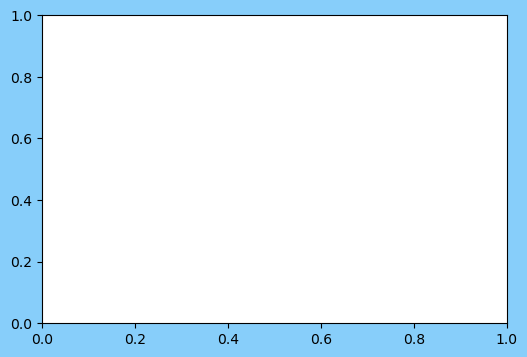

In [5]:
fig, ax = plt.subplots(
    facecolor='lightskyblue', # cor da borda
    figsize=(6,4))# tamanho do grafico

### Graficos interativos

>  ver arquivo QtAgg.py

### Creating Figures

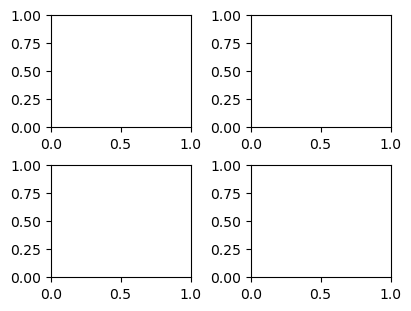

In [6]:
fig, axs = plt.subplots(2, 2, # dimensão
                       figsize=(4,3),
                       layout ='constrained')

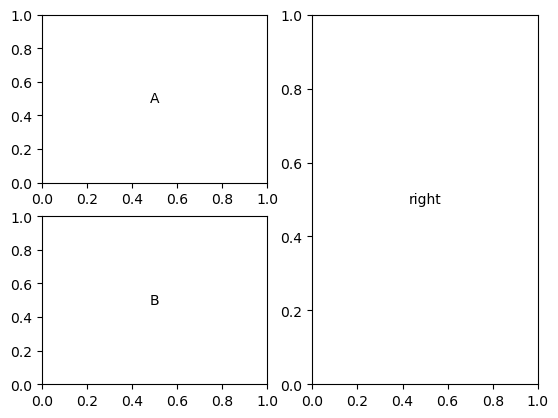

In [7]:
# usando plot.subplot_mosaic
fig, axs = plt.subplot_mosaic([
    ['A','right'],
    ['B', 'right'],
])
for ax_name in axs:
    axs[ax_name].text(0.5,0.5, ax_name, ha='center', va='center')

Text(0.5, 0.98, 'Right subfigure')

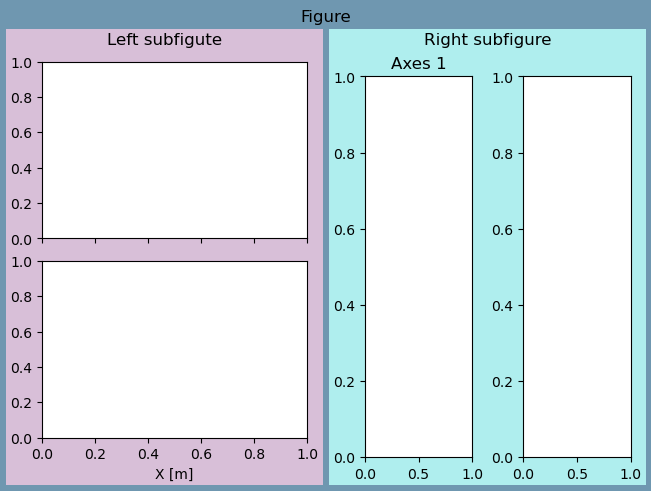

In [8]:
fig = plt.figure(layout='constrained', facecolor='#6F97B0')
fig.suptitle('Figure')
figL, figR = fig.subfigures(1,2)
axL = figL.subplots(2,1, sharex=True)
figL.suptitle('Left subfigute')
figL.set_facecolor('thistle')
axL[1].set_xlabel('X [m]')
figR.set_facecolor('paleturquoise')
axR = figR.subplots(1,2, sharex=True)
axR[0].set_title('Axes 1')
figR.suptitle('Right subfigure')


### Types of inputs toplotting functions

In [9]:
# Criando a matrix
b = np.matrix([[1,2], [3,4]])
b_asarry = np.asarray(b)

In [10]:
np.random.seed(19680801)
data = {'a': np.arange(50),
        'c': np.random.randint(0,50, 50),
        'd': np.random.rand(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d'])*100


fig, ax = plt.subplots(figsize=(8, 6),layout='constrained', facecolor='lightgray')
ax.scatter(data=data, x='a', y='b', c='c', s='d')
fig.suptitle('Scatter plot')
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

## Coding style

__As interfaces explícitas e implícitas__

Como observado acima, existem essencialmente duas maneiras de usar o Matplotlib:

- Crie explicitamente Figuras e Eixos e chame métodos neles (o "estilo orientado a objetos (OO)").

- Confia no pyplot para criar e gerenciar implicitamente as Figuras e Eixos, e use as funções do pyplot para plotar.

Consulte Matplotlib Application Interfaces (APIs) para uma explicação das compensações entre as interfaces implícita e explícita.

Então pode-se usar o estilo OO

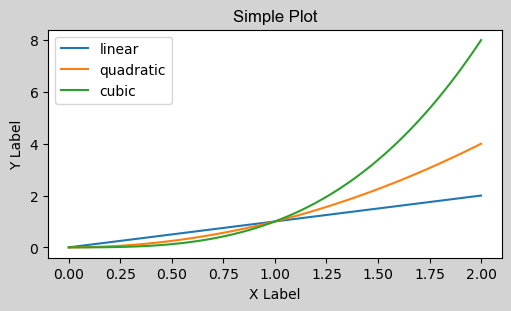

In [11]:
x = np.linspace(0,2,100) # sample data

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained', facecolor='lightgray')
fig
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel('X Label'),
ax.set_ylabel('Y Label')
ax.set_title("Simple Plot", fontdict=dict(family='arial'))
ax.legend()

### Fazendo uma função de ajudante

    Se você precisar fazer os mesmos gráficos repetidamente com diferentes conjuntos de dados, ou quiser envolver facilmente os métodos Matplotlib, use a função de assinatura recomendada abaixo.

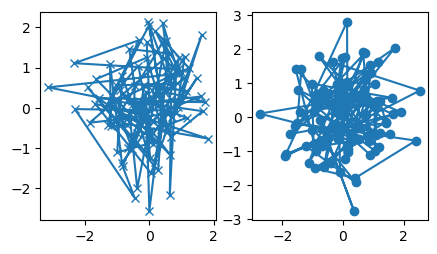

In [12]:
def my_plotter(ax, data1, data2, param_dic):
    """
    Um função de ajuda para fazer um gráfico
    """
    
    out = ax.plot(data1, data2, **param_dic)
    return out

# vamos plotar populações com dois subplots
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})


## Stylingh Artits

A maioria dos métodos de plotagem tem opções de estilo para os Artistas, acessíveis quando um método de plotagem é chamado ou a partir de um "setter" no Artista. No gráfico abaixo, definimos manualmente a cor, a largura da linha e o estilo de linha dos Artistas criados pelo ```plot```o, e definimos o estilo de linha da segunda linha após o fato com ```set_linestyle```.

fix, ax = plt.subplots(figsize=(8,6))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, =ax.plot(x, np.cumsum(data2), color='orange', linewidth=2, linestyle=':')

### Color

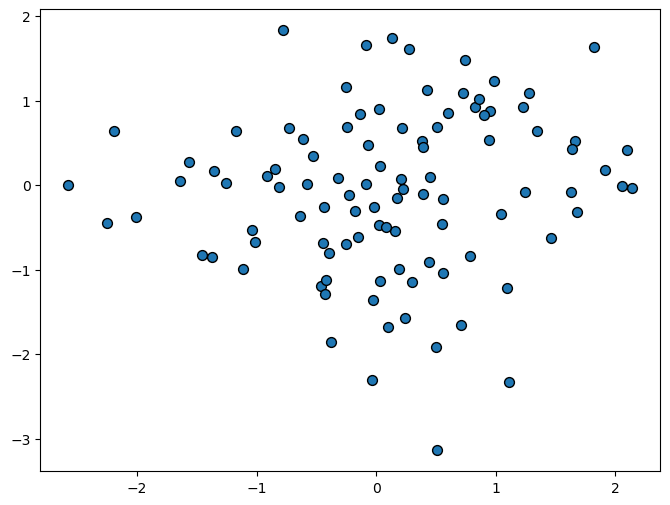

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=data2, y=data1, s=50, facecolor='C0', edgecolors='k')

### Linewidths, linestyles, and markersizes

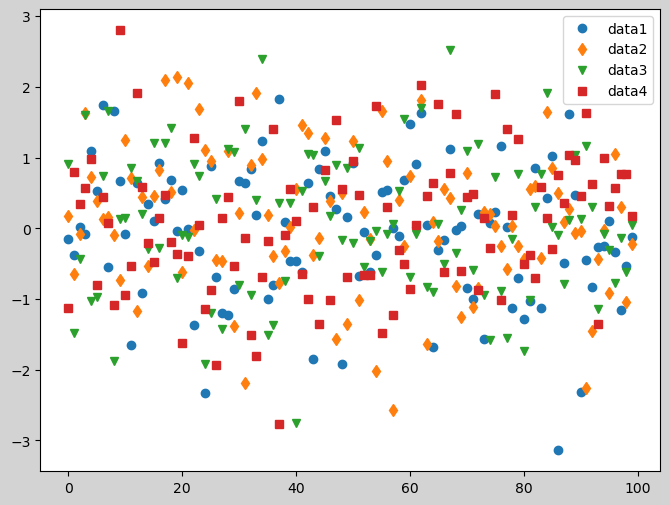

In [14]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgray')
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend(loc='upper right')

### Labeling plots

> Axes labels and tex

set_xlabel, set_ylabel, and set_title are used to add text in the indicated locations (see Text in Matplotlib Plots for more discussion). Text can also be directly added to plots using text:

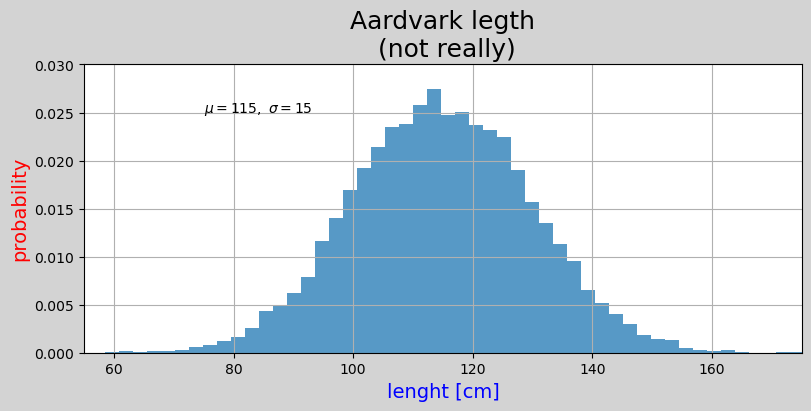

In [15]:
mu, sigma = 115, 15 # variáveis
x = mu+sigma * np.random.randn(10000) # cria dados
fig, ax = plt.subplots(figsize=(8,4), layout = 'constrained', facecolor='lightgray')
# Histograma dos dados
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)
ax.set_xlabel('lenght [cm]', fontdict=dict(color='blue', fontsize=14))
ax.set_ylabel('probability', fontdict=dict(fontsize=14, color='red'))
ax.set_title('Aardvark legth\n (not really)', fontdict=dict(fontsize=18))
ax.text(75, 0.025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

### Anotations

(-2.0, 2.0)

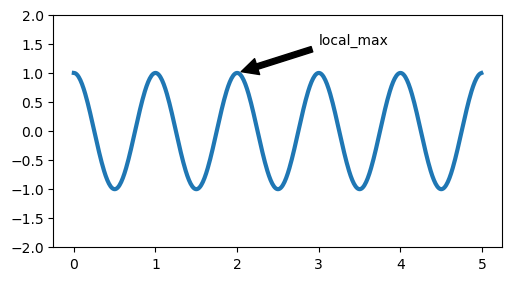

In [16]:

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t,s, lw=3)

ax.annotate('local_max', xy=(2,1), xytext=(3,1.5), 
           arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_ylim(-2,2)

### legends

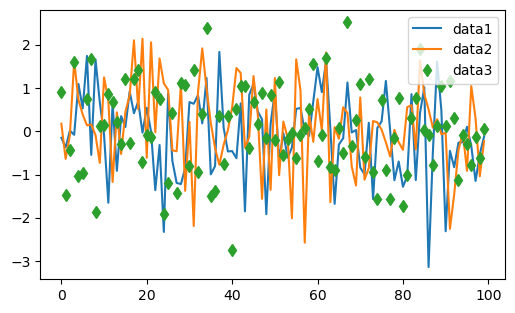

In [17]:
fig, ax = plt.subplots(figsize=(6,3.5))
ax.plot(np.arange(len(data1)),data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend(loc='upper right')

## Axis scales and ticks

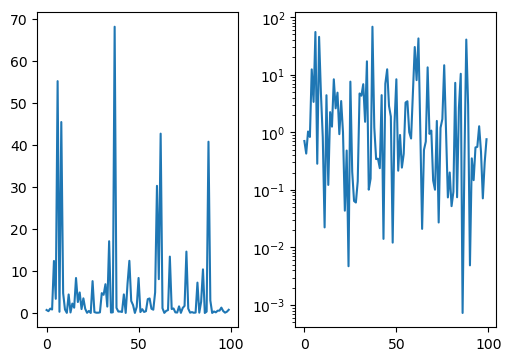

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(5, 3.5), layout='constrained')

xdata = np.arange(len(data2))
data = 10**data1

axs[0].plot(xdata, data)
axs[1].set_yscale('log')
axs[1].plot(xdata, data)

### Tick locators and formatters

Text(0.5, 1.0, 'Manual ticks')

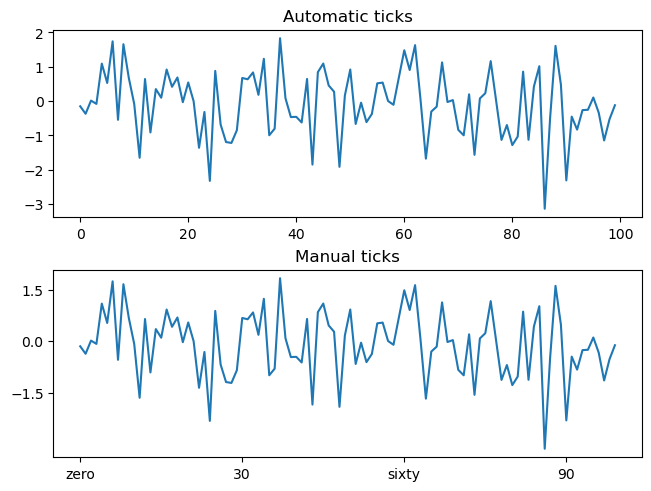

In [19]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0,100,30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])
axs[1].set_title('Manual ticks')

### Plotting dates and strings

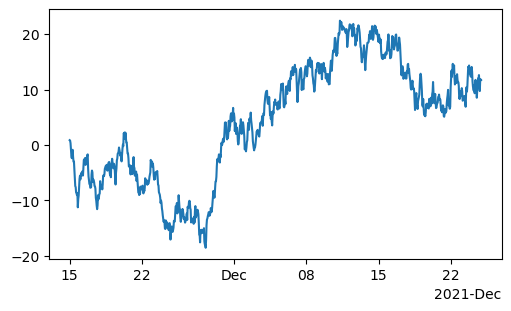

In [20]:
fig, ax = plt.subplots(figsize=(5, 3), layout = 'constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                 np.timedelta64(1,'h'))
data = np.cumsum(np.random.randn(len(dates)))

ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_minor_locator())
ax.xaxis.set_major_formatter(cdf)

<BarContainer object of 4 artists>

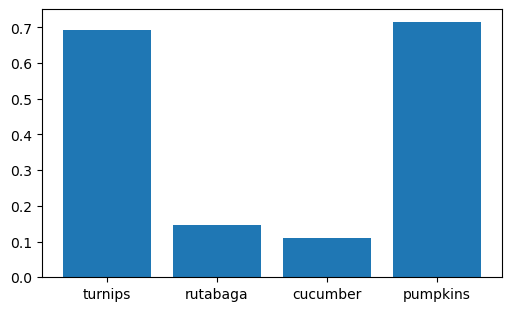

In [21]:
fig, ax = plt.subplots(figsize=(5,3), layout='constrained')

categories = ['turnips', 'rutabaga','cucumber' ,'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

## Additional Axis objects

O plot de dados de diferentes magnitudes em um gráfico pode exigir um eixo y adicional. Tal Eixo pode ser criado usando twinx para adicionar novos Eixos com um eixo x invisível e um eixo y posicionado à direita (análogo para twiny). 

Da mesma forma, você pode adicionar um secondary_xaxis ou secondary_yaxis com uma escala diferente do Eixo principal para representar os dados em diferentes escalas ou unidades. Veja Eixo Secundário para mais exemplos.

Text(0.5, 0, 'Angel []')

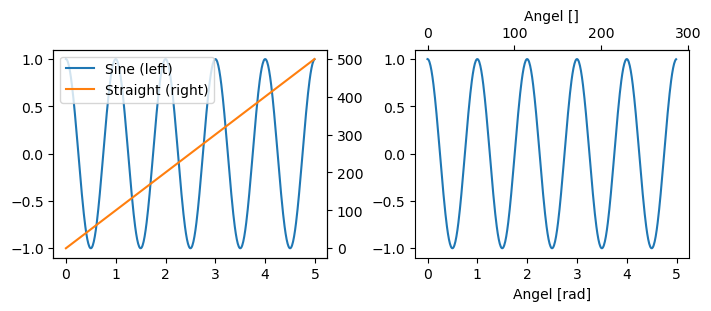

In [41]:
fig, (ax1, ax3) =plt.subplots(1, 2, figsize=(7,3), layout='compressed')
l1, = ax1.plot(t,s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)),'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t,s)
ax3.set_xlabel('Angel [rad]')
ax4= ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angel []')

In [23]:
fig?

Type:           Figure
String form:    Figure(700x300)
File:           ~/opt/anaconda3/envs/dash_env/lib/python3.11/site-packages/matplotlib/figure.py
Docstring:     
The top level container for all the plot elements.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure background patch.

suppressComposite
    For multiple images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats, default: :rc:`figure.figsize`
    Figure dimension ``(width, height)`` in inches.

dpi : float, default: :rc:`figure.dpi`
    Dots per inch.

facecolor : default: :rc:`figure.facecolor`
    The figure patch facecolor.

edgecolor : default: :rc:`figure.edgecolor`
    The figure patch edge color.

linewidth : float
    The linewidth of the frame (i.e. the edge linewidth of the figure
    pat

# Intemediário